# Project: Build a Traffic Sign Recognition Program

[//]: # (Image References)
[step-1-lenet-best]: ./images/step-1-lenet-best.png "LeNet - best results"
[step-1-lenet-t2]: ./images/step-1-lenet-t2.png "LeNet - graph with best results"

Overview
---

In this project we are going to train a network to recognize traffic signs.\
The dataset of traffic signs come from [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) and this dataset will be used to train the neural network recognizing traffic signs.\
\
To track results of all training experiments I use [Neptune.ml](http://neptune.ml) tool.

## Step 0: Load The Data

At the beginning we need to load the dataset. Dataset is kept in the folder `data` and it contains following files:\
```bash
total 311760
-rw-r--r--@ 1 grzegorz.tyminski  staff   38888118 Nov  7  2016 test.p
-rw-r--r--@ 1 grzegorz.tyminski  staff  107146452 Feb  2  2017 train.p
-rw-r--r--@ 1 grzegorz.tyminski  staff   13578712 Feb  2  2017 valid.p
```
Class loading this dataset is implemented in the file [traffic_sign_dataset.py](traffic_sign_dataset.py).

In [ ]:
from traffic_sign_dataset import TrafficData

# initiate and load dataset
dataset = TrafficData()

# normalize dataset --> change values of pixels from 0..255 to 0..1
dataset.normalize_data()
# randomize the orderd of images in dataset
dataset.shuffle_dataset()
    
X_train, y_train = dataset.get_training_dataset()
X_valid, y_valid = dataset.get_validation_dataset()
X_test, y_test = dataset.get_testing_dataset()



In [ ]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:
dataset.preview_random()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.title("Number of images per class in dataset")

plt.hist(y_train,bins = n_classes, alpha=0.2, label = 'train')
plt.hist(y_test,bins = n_classes, alpha=0.2, label='test')
plt.hist(y_valid,bins = n_classes, alpha=0.2, label='valid')

plt.legend()

In [ ]:
print(dataset.label_for(0))
print(dataset.label_for(7))
print(dataset.label_for(16))
print(dataset.label_for(19))
print(dataset.label_for(24))
print(dataset.label_for(27))
print(dataset.label_for(29))
print(dataset.label_for(32))
print(dataset.label_for(37))
print(dataset.label_for(39))
print(dataset.label_for(41))

## Step 1: Train same LeNet as in MNIST example (v1)

In [ ]:
from LeNet import LeNet
import tensorflow as tf

lenet = LeNet(output_classes=43)
lenet.start_neptune_session('eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vbmVwdHVuZS5pbnRpdmUub3JnIiwiYXBpX2tleSI6IjAzZmMyZjBlLWY2ODQtNDQ1Yi1hNjU5LTAwMjNmNTFhMDc0YyJ9', 'grzegorz.tyminski/Traffic-Sign-Classifier')

In [ ]:
lenet.set_hiperparams(epochs=10, batch_size=64, learn_rate=0.002)

In [ ]:
lenet.train(dataset)

In [ ]:
lenet.model_summary()

## Step 2: Train modified LeNet with dropouts (v2)

In [ ]:
from LeNet2 import LeNet2
import tensorflow as tf

lenet = LeNet2(output_classes=43)
lenet.start_neptune_session('eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vbmVwdHVuZS5pbnRpdmUub3JnIiwiYXBpX2tleSI6IjAzZmMyZjBlLWY2ODQtNDQ1Yi1hNjU5LTAwMjNmNTFhMDc0YyJ9', 'grzegorz.tyminski/Traffic-Sign-Classifier')

In [ ]:
lenet.set_hiperparams(epochs=10, batch_size=64, learn_rate=0.002, dropout_val=0.25)

In [ ]:
lenet.train(dataset)

In [ ]:
lenet.model_summary()

## Step 3: Improve dataset normalization

- improve brightness
- to grayscale

... and training __with__ Dropout

In [1]:
from traffic_sign_dataset import TrafficData

# initiate and load dataset
dataset = TrafficData()

# normalize dataset --> change values of pixels from 0..255 to 0..1
dataset.normalize_data(brightness=True, grayscale=True)
# randomize the orderd of images in dataset
dataset.shuffle_dataset()
    
X_train, y_train = dataset.get_training_dataset()
X_valid, y_valid = dataset.get_validation_dataset()
X_test, y_test = dataset.get_testing_dataset()



In [2]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


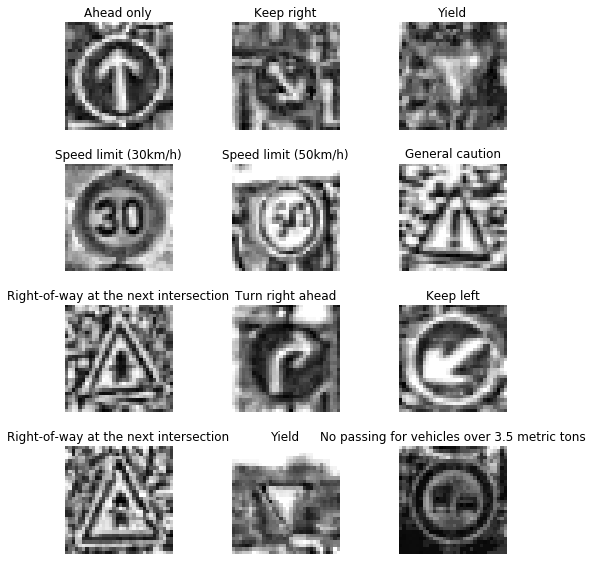

In [3]:
dataset.preview_random(grayscale=True)

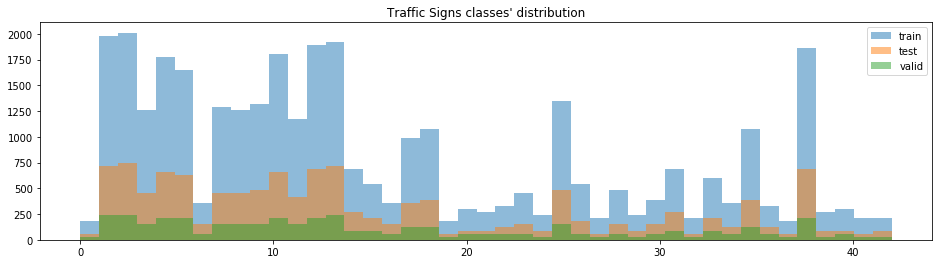

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.title("Traffic Signs classes' distribution")

plt.hist(y_train,bins = n_classes, alpha=0.5, label = 'train')
plt.hist(y_test,bins = n_classes, alpha=0.5, label='test')
plt.hist(y_valid,bins = n_classes, alpha=0.5, label='valid')

plt.legend()

In [19]:
from LeNet3 import LeNet3
import tensorflow as tf

lenet = LeNet3(output_classes=43)
lenet.start_neptune_session('eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vbmVwdHVuZS5pbnRpdmUub3JnIiwiYXBpX2tleSI6IjAzZmMyZjBlLWY2ODQtNDQ1Yi1hNjU5LTAwMjNmNTFhMDc0YyJ9', 'grzegorz.tyminski/Traffic-Sign-Classifier')

In [20]:
lenet.set_hiperparams(epochs=10, batch_size=32, learn_rate=0.001, dropout_val=0.75)

In [21]:
lenet.train(dataset)

TSC-274
https://neptune.intive.org/grzegorz.tyminski/Traffic-Sign-Classifier/e/TSC-274
Training...

EPOCH 1 ...
Validation Accuracy = 0.618
Test Accuracy = 0.619

EPOCH 2 ...
Validation Accuracy = 0.718
Test Accuracy = 0.731

EPOCH 3 ...
Validation Accuracy = 0.782
Test Accuracy = 0.774

EPOCH 4 ...
Validation Accuracy = 0.807
Test Accuracy = 0.804

EPOCH 5 ...
Validation Accuracy = 0.821
Test Accuracy = 0.822

EPOCH 6 ...
Validation Accuracy = 0.850
Test Accuracy = 0.835

EPOCH 7 ...
Validation Accuracy = 0.853
Test Accuracy = 0.846

EPOCH 8 ...
Validation Accuracy = 0.869
Test Accuracy = 0.854

EPOCH 9 ...
Validation Accuracy = 0.862
Test Accuracy = 0.857

EPOCH 10 ...
Validation Accuracy = 0.875
Test Accuracy = 0.862



In [8]:
lenet.model_summary()

---------
Variables: name (type shape) [size]
---------
Variable:0 (float32_ref 5x5x1x6) [150, bytes: 600]
Variable_1:0 (float32_ref 6) [6, bytes: 24]
Variable_2:0 (float32_ref 5x5x6x16) [2400, bytes: 9600]
Variable_3:0 (float32_ref 16) [16, bytes: 64]
Variable_4:0 (float32_ref 400x120) [48000, bytes: 192000]
Variable_5:0 (float32_ref 120) [120, bytes: 480]
Variable_6:0 (float32_ref 120x84) [10080, bytes: 40320]
Variable_7:0 (float32_ref 84) [84, bytes: 336]
Variable_8:0 (float32_ref 84x43) [3612, bytes: 14448]
Variable_9:0 (float32_ref 43) [43, bytes: 172]
Total size of variables: 64511
Total bytes of variables: 258044


## Step 4: Dataset with normalization as before

... but training __without__ Dropout

In [22]:
from LeNet4 import LeNet4
import tensorflow as tf

lenet = LeNet4(output_classes=43)
lenet.start_neptune_session('eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vbmVwdHVuZS5pbnRpdmUub3JnIiwiYXBpX2tleSI6IjAzZmMyZjBlLWY2ODQtNDQ1Yi1hNjU5LTAwMjNmNTFhMDc0YyJ9', 'grzegorz.tyminski/Traffic-Sign-Classifier')

In [25]:
lenet.set_hiperparams(epochs=10, batch_size=128, learn_rate=0.001)

In [26]:
lenet.train(dataset)

TSC-276
https://neptune.intive.org/grzegorz.tyminski/Traffic-Sign-Classifier/e/TSC-276
Training...

EPOCH 1 ...
Validation Accuracy = 0.762
Test Accuracy = 0.769

EPOCH 2 ...
Validation Accuracy = 0.851
Test Accuracy = 0.849

EPOCH 3 ...
Validation Accuracy = 0.889
Test Accuracy = 0.875

EPOCH 4 ...
Validation Accuracy = 0.898
Test Accuracy = 0.890

EPOCH 5 ...
Validation Accuracy = 0.922
Test Accuracy = 0.902

EPOCH 6 ...
Validation Accuracy = 0.922
Test Accuracy = 0.905

EPOCH 7 ...
Validation Accuracy = 0.926
Test Accuracy = 0.905

EPOCH 8 ...
Validation Accuracy = 0.922
Test Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.928
Test Accuracy = 0.911

EPOCH 10 ...
Validation Accuracy = 0.931
Test Accuracy = 0.914



In [12]:
lenet.model_summary()

---------
Variables: name (type shape) [size]
---------
Variable:0 (float32_ref 5x5x1x6) [150, bytes: 600]
Variable_1:0 (float32_ref 6) [6, bytes: 24]
Variable_2:0 (float32_ref 5x5x6x16) [2400, bytes: 9600]
Variable_3:0 (float32_ref 16) [16, bytes: 64]
Variable_4:0 (float32_ref 400x120) [48000, bytes: 192000]
Variable_5:0 (float32_ref 120) [120, bytes: 480]
Variable_6:0 (float32_ref 120x84) [10080, bytes: 40320]
Variable_7:0 (float32_ref 84) [84, bytes: 336]
Variable_8:0 (float32_ref 84x43) [3612, bytes: 14448]
Variable_9:0 (float32_ref 43) [43, bytes: 172]
Variable_10:0 (float32_ref 5x5x1x6) [150, bytes: 600]
Variable_11:0 (float32_ref 6) [6, bytes: 24]
Variable_12:0 (float32_ref 5x5x6x16) [2400, bytes: 9600]
Variable_13:0 (float32_ref 16) [16, bytes: 64]
Variable_14:0 (float32_ref 400x120) [48000, bytes: 192000]
Variable_15:0 (float32_ref 120) [120, bytes: 480]
Variable_16:0 (float32_ref 120x84) [10080, bytes: 40320]
Variable_17:0 (float32_ref 84) [84, bytes: 336]
Variable_18:0 (floa

In [ ]:
from traffic_sign_dataset import TrafficData

# initiate and load dataset
dataset = TrafficData()

# normalize dataset --> change values of pixels from 0..255 to 0..1
dataset.normalize_data(brightness=True, grayscale=True)
# randomize the orderd of images in dataset
dataset.shuffle_dataset()
    
X_train, y_train = dataset.get_training_dataset()
X_valid, y_valid = dataset.get_validation_dataset()
X_test, y_test = dataset.get_testing_dataset()



In [ ]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:
from LeNet4 import LeNet4
import tensorflow as tf

lenet = LeNet4(output_classes=43)
lenet.start_neptune_session('eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vbmVwdHVuZS5pbnRpdmUub3JnIiwiYXBpX2tleSI6IjAzZmMyZjBlLWY2ODQtNDQ1Yi1hNjU5LTAwMjNmNTFhMDc0YyJ9', 'grzegorz.tyminski/Traffic-Sign-Classifier')

In [ ]:
lenet.set_hiperparams(epochs=10, batch_size=64, learn_rate=0.002)

In [ ]:
lenet.train(dataset)

----------------

----------------

----------------

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [ ]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

dataset.normalize_data()
dataset.shuffle_dataset()

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from LeNet import LeNet
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")